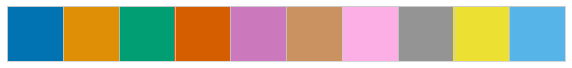

In [52]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.stats.proportion as smp
import statsmodels.stats.api as sms
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
sns.set_palette("colorblind", n_colors=10)

palette = sns.color_palette(palette="colorblind", n_colors=10)
sns.palplot(palette)

## Point Estimate

Point estimates are estimates of population parameters based on sample data.

**Population:** Number of orders at a website per hour. We will use a Poisson random variable as this is typically used to model the number of times an event happened in a time interval. However, we will combine two poisson distributions to create an interesting distribution.

**Sample:** Random choice of 500 orders per hour. Calculate point estimate of population mean, the sample mean.

In [2]:
np.random.seed(10)

orders_1 = stats.poisson.rvs(mu=40, size=200000)
orders_2 = stats.poisson.rvs(mu=10, size=150000)
orders = np.concatenate([orders_1, orders_2])
print(f"population mean: {orders.mean()}")
print("")

np.random.seed(10)
sample_sizes = [10, 50, 100, 200, 500, 1000, 3000, 10000, 20000]
for sample_size in sample_sizes:
    sample = np.random.choice(orders, size=sample_size)
    print(f"sample mean (sample={sample_size}): {sample.mean()}")

population mean: 27.145874285714285

sample mean (sample=10): 25.1
sample mean (sample=50): 23.18
sample mean (sample=100): 25.08
sample mean (sample=200): 27.995
sample mean (sample=500): 26.75
sample mean (sample=1000): 27.085
sample mean (sample=3000): 27.34
sample mean (sample=10000): 27.2043
sample mean (sample=20000): 27.42235


We expect the distribution of the sample to be of similar shape to that of the population. Therefore, we can assume that the the sample mean $\overline{x}$ should have the same value as population mean $\mu$. Usually, the point estimator becomes more accurate as the size of the sample increases.

## The Central Limit Theorem

In statistics we often assume that our data follows a gaussian distribution. Gaussian distributions have nice properties like being symmetric and having the majority of the data clustered within a few standard deviations of the mean. The real world often does not follow normal distributions, additionally a sample tends to follow the distribution of the population. This means a sample taken from a population that is not gaussian will also tend to be not gaussian.


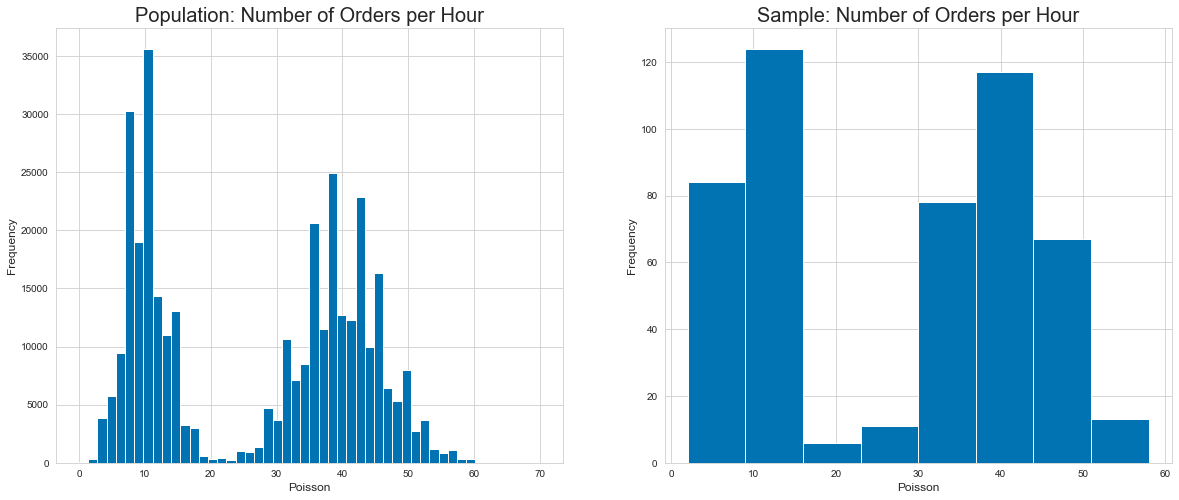

In [29]:
fig = plt.figure(figsize=(20, 8))
ax1 = plt.subplot(1, 2, 1)

sns.distplot(
    orders, 
    kde=False,
    hist_kws=dict(alpha=1),
    ax=ax1
)

ax1.set_title("Population: Number of Orders per Hour", fontsize=20)
ax1.set_xlabel("Poisson", fontsize=12)
ax1.set_ylabel("Frequency", fontsize=12)

ax2 = plt.subplot(1, 2, 2)

sample = np.random.choice(orders, size=500)

sns.distplot(
    sample ,
    kde=False,
    hist_kws=dict(alpha=1),
    ax=ax2
)

ax2.set_title("Sample: Number of Orders per Hour", fontsize=20)
ax2.set_xlabel("Poisson", fontsize=12)
ax2.set_ylabel("Frequency", fontsize=12)

plt.show()

The sample distribution resembles the underlying population distribution. This suggests that we can't apply techniques that assume a normal distribution.

The central limit theorem suggest that the distribution of many sample means, known as a sampling distribution, will be normally distributed. This rule holds even if the underlying distribution itself is not normally distributed.

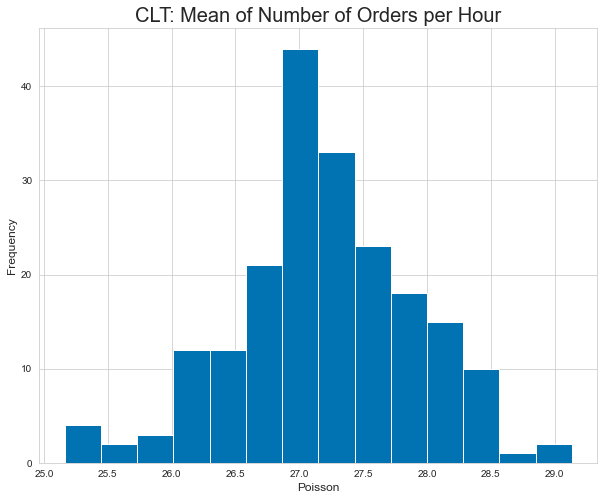

In [30]:
np.random.seed(10)

samples = 200
point_estimates_orders = [np.random.choice(orders, size = 500).mean()
                   for _ in range(samples)]

fig = plt.figure(figsize=(10, 8))
ax = plt.subplot(1, 1, 1)

sns.distplot(
    point_estimates_orders, 
    kde=False,
    hist_kws=dict(alpha=1),
    ax=ax
)

ax.set_title("CLT: Mean of Number of Orders per Hour", fontsize=20)
ax.set_xlabel("Poisson", fontsize=12)
ax.set_ylabel("Frequency", fontsize=12)


plt.show()

The sampling distribution appears roughly normal. Additionally, the mean of the sampling distribution approaches the true population mean:

In [15]:
perc_difference = (orders.mean() - np.mean(point_estimates))/orders.mean()

print(
    f"Percentage differance of point estimate to mean of population: {np.round(perc_difference, 3)}%"
)

Percentage differance of point estimate to mean of population: -0.002%


## Confidence Intervals

A point estimate can give us a rough approximation of a population parameter. A confidence interval is a range of values above and below a point estimate that captures the true population parameter at some predetermined confidence level. 



$$ \begin{align} \text{Confidence Interval} = \text{Point Estimate } \pm \text{Margin of Error}\end{align} $$
$$ \begin{align} \text{Margin of Error = 'a few' Standard Errors}\end{align} $$
  
$$ \begin{align} \text{point estimate} \pm z * SE \end{align} $$
  
* $z$ is called the critical value and it corresponds to the confidence level that we chose. For instance, we know that roughly 95% of the data in a normal distribution lies within 2 standard deviations from the mean, so we could use 2 as the z-critical value for a 95% confidence interval
* Standard error for a point estimate is estimated from the data and computed using a formula
* The value $z * SE$ is called the margin of error
* Confidence level can be explained in the following way. If we repeat the study many times each time producing a new sample (of same size) from which 95% confidence interval is computed, then 95% of the confidence intervals are expected to have the population parameter



### One Proportion

**Assumptions**  
1) $n*\hat{p}=10$ and $n*1-\hat{p}=10$  
2) Random Sample
  
$$\text{Confidence Interval = } \text{point estimate} \pm z * \sqrt{\frac{\hat{p}(1-\hat{p})}{n}}$$

We can enforce a *conservative* confidence interval by setting $\hat{p}$ equal to 0.5 which will increase the interval.

$$\text{Confidence Interval = } \text{point estimate} \pm z * \sqrt{\frac{1}{2n}}$$

In [70]:
n = 659
p = 0.85

conf_int = smp.proportion_confint(
    count=n*p, 
    nobs=n, 
    alpha=0.05, 
    method='normal'
)

print(f"confidence interval: {conf_int}")

confidence interval: (0.8227378265796143, 0.8772621734203857)


### Two Proportions

**Assumptions**  
1) $n_1*\hat{p_1}=10$ and $n_1*1-\hat{p_1}=10$ and $n_2*\hat{p_2}=10$ and $n_2*1-\hat{p_2}=10$  
2) Random Sample

$$\text{Confidence Interval = } \text{point estimate} \pm z * \sqrt{\frac{\hat{p_1}(1-\hat{p_1})}{n_1} + \frac{\hat{p_2}(1-\hat{p_2})}{n_2}}$$

### One Mean

1) Population normal (or $n\geq25$ enforce CLT)  
2) Random Sample

$$ \overline{x} \pm t * \frac{s}{ \sqrt{n} }$$ , degrees of freedom: $n-1$



In [89]:
conf_int = sms.DescrStatsW(orders).zconfint_mean(alpha=0.05, alternative='two-sided')

print(f"obs: {len(orders)}")
print(f"std dev: {np.std(orders)}")
print(f"mean: {np.mean(orders)}")
print(f"confidence interval: {conf_int}")

obs: 350000
std dev: 15.729152755538141
mean: 27.145874285714285
confidence interval: (27.093764412150435, 27.197984159278136)


### Difference in Means for Paired Data

$$ \overline{x_d} \pm t * \frac{s_d}{ \sqrt{n} }$$ , degrees of freedom: $n-1$

### Difference in Means for Independent Groups

**Assumptions**  
1) Population normal (or $n_1\geq25$, $n_2\geq25$ enforce CLT)  
2) Random Sample

*Unpooled* $\sigma_1 \neq \sigma_2$:

$$ (\overline{x_1} - \overline{x_2}) \pm t * \sqrt{\frac{s_1^2}{n_1}\frac{s_2^2}{n_2}} $$

, degrees of freedom: $\min(n_1-1,n_2-1)$ or Welch approximation

*Pooled* $\sigma_1 = \sigma_2$:

$$ (\overline{x_1} - \overline{x_2}) \pm t * \sqrt{\frac{(n_1-1)s_1^2+(n_2-1)s_2^2}{n_1+n_2-2}}*\sqrt{\frac{1}{n_1}+\frac{1}{n_2}} $$

, degrees of freedom: $n_1+n_2-2$